## 2. What is the difference in expression level at different timepoints for those genes that are a DEG when comparing the mutant to the background?

We found that, especially at T1, many genes are DE when comparing Siz1.2 and 1xB mutants to the background.

Here we plot the expression level of these DEGs for the mutant compared to the background, at different timepoints. 
Moreover, to determine the effect of the deletion/knockdown of genes that are involved in growth, we highlight putative targets of TFs PIF4, BZR1 and ARF6.


In [5]:
# Assume notebook is in [workingdir]/notebooks and data is in [workingdir]/data. 
# Results will be stored in [workingdir]/results

import os
if os.getcwd().split('/')[-1] == 'notebooks': 
    os.chdir('..') # move one directory up to [workingdir]
    
workingdir = os.getcwd()

print('Assuming data is stored in '+workingdir+'/data/, results will be stored in '+workingdir+'/results/')
os.system('mkdir -p results')
outdirname = 'results/scatterplots/'
os.system('mkdir -p '+outdirname)



# General stuff:
# imports
from matplotlib import pyplot as plt
import numpy as np

import sys, pickle, os
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from scipy import stats




Assuming data is stored in /Users/like/Dropbox/00.Projects/Like_Harrold/repository/data/, results will be stored in /Users/like/Dropbox/00.Projects/Like_Harrold/repository/results/


### 2.1 Compare expression level of genes that are a DEG in time in the background
In the heatmaps (`1.heatmap_bkgrDEGs_inMutant.ipynb`), it seems as though the change in expression level of genes that are differentially expressed in time in _pad4_ is less extreme in the mutants. 

Let's quickly double-check using a scatterplot.

In [6]:
#names
strains     = ['pad4', 'siz1-2_pad4', '1xB_pad4']
timepoints  = ['T0','T1','T2']

# allDEGs is set of probe_ids that are DE (q <= 0.01) when comparing T0 to T1 or T2 and T1 to T2
# pickled in 1.heatmap_bkgrDEGs_inMutant 
allDEGs = pickle.load(open('results/DEGs_in_Pad4/pickles/ALL.probes_as_set')) 

# data on expression levels
# 'average_expression.tab': file made in calculate_average_expression_levels.ipynb
df   = pd.read_csv('results/average_expression.tab', sep = '\t') 



Scatterplots of difference in expression when comparing two consecutive timepoints, in the mutant versus the background, for those genes that are a DE in time in background.

siz1-2_pad4


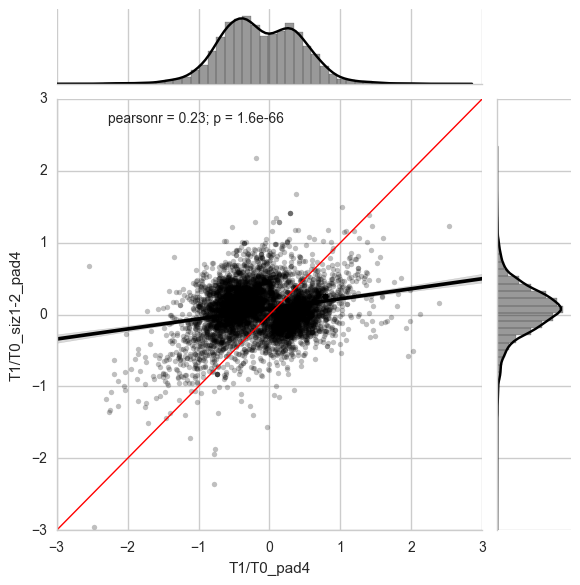

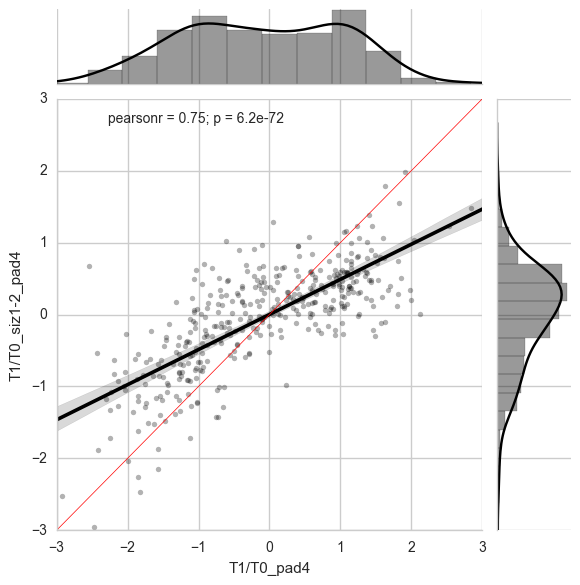

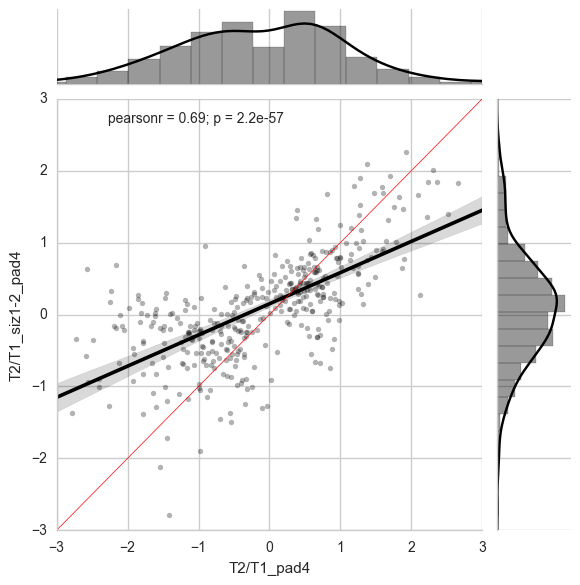

1xB_pad4


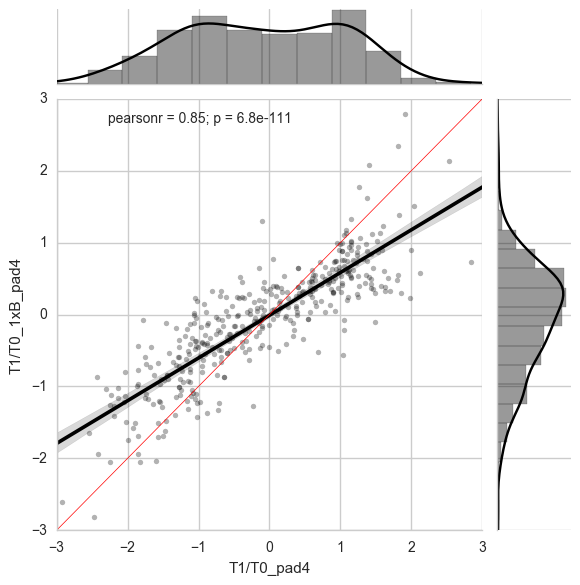

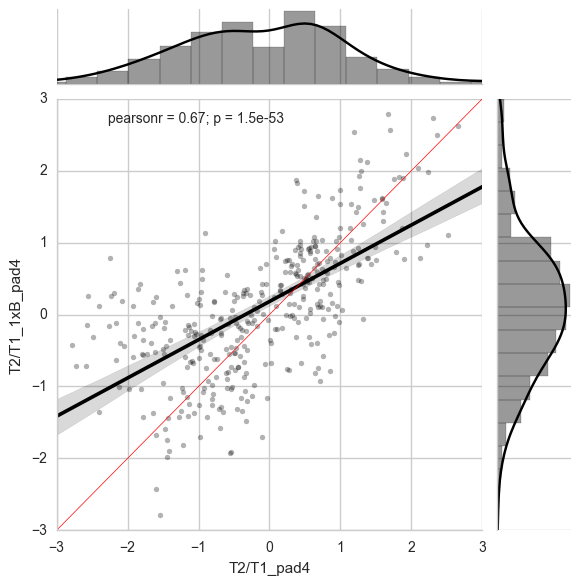

In [7]:
##########
#  Difference in expression when comparing two consecutive timepoints (e.g. T1 to T0, or T2 to T1):
#  x-axis: pad4, y-axis: mutant (siz12 or SUMO1/2KD)
#  Plot only those genes that are differentially expressed when comparing different timepoints in the pad4 strains
#  (i.e. the same genes that are in the heatmaps)
#
# plot a red line x=y for reference
##########

BKGR = strains[0]
DEGs = df[df.probeset_id.isin(allDEGs)] 

# put all data in a single dataFrame
all_rel_data = pd.DataFrame({'probeset_id': DEGs['probeset_id'], 'T1/T0_'+BKGR: DEGs['T1_'+BKGR]-DEGs['T0_'+BKGR],\
                             'T2/T1_'+BKGR: DEGs['T2_'+BKGR]-DEGs['T1_'+BKGR],\
                             'T1/T0_'+strains[1]: DEGs['T1_'+strains[1]]-DEGs['T0_'+strains[1]],\
                             'T2/T1_'+strains[1]: DEGs['T2_'+strains[1]]-DEGs['T1_'+strains[1]],\
                             'T1/T0_'+strains[2]: DEGs['T1_'+strains[2]]-DEGs['T0_'+strains[2]],\
                             'T2/T1_'+strains[2]: DEGs['T2_'+strains[2]]-DEGs['T1_'+strains[2]]})
                                

sns.set_style("whitegrid")
for S in strains[1:]:
    print S
    plt.figure()
    g = sns.jointplot(all_rel_data['T1/T0_'+BKGR], all_rel_data['T1/T0_'+S], \
                      kind="reg", color="black", scatter_kws = {'s':15, 'alpha':0.3})
    g.ax_joint.set_xlim(-3, 3)
    g.ax_joint.set_ylim(-3, 3)
    
    (xmin,xmax) = g.ax_joint.get_xlim()
    x = np.arange(xmin,xmax+1)
    g.ax_joint.plot(x, 1*x, color = 'red', linewidth=0.5)
    plt.show()
    plt.close()
    
    plt.figure()
    g = sns.jointplot(all_rel_data['T2/T1_'+BKGR], all_rel_data['T2/T1_'+S], \
                      kind="reg", color="black", scatter_kws = {'s':15, 'alpha':0.3})
    g.ax_joint.set_xlim(-3, 3)
    g.ax_joint.set_ylim(-3, 3)
    (xmin,xmax) = g.ax_joint.get_xlim()
    x = np.arange(xmin,xmax+1)
    g.ax_joint.plot(x, 1*x, color = 'red', linewidth=0.5)
    
    plt.show()
    plt.close()
    



Indeed, we see that for these genes, their change in expression (either up or down) is less extreme in the mutants.

### 2.2 Compare expression level of genes that are diff. expr. when comparing a mutant to the background strains, at different timepoints

Comparing strains per timepoint rather than timepoints per strain:  
How do DEGs differ?  

We plot the difference compared to T0 per timepoint T1 or T2 for the background strain _pad 4_ (x-axis) and the mutant strains _siz1 pad4_ and _sumo1/2KD pad 4_ (y-axis).



siz1-2_pad4 allT T1/T0
saved in: results/scatterplots/siz1-2_pad4/T1-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT.scatter.png


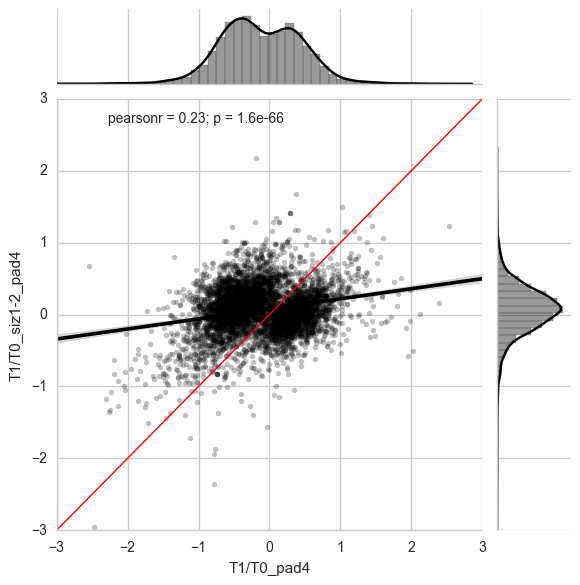

siz1-2_pad4 allT T2/T1
saved in: results/scatterplots/siz1-2_pad4/T2-T1_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT.scatter.png


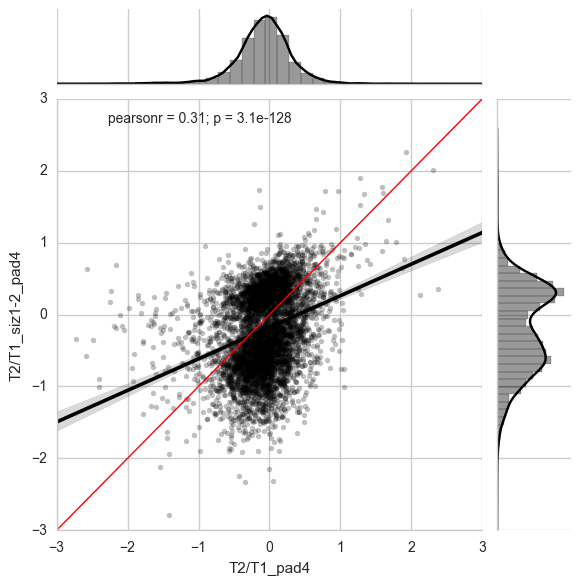

siz1-2_pad4 allT T2/T0
saved in: results/scatterplots/siz1-2_pad4/T2-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT.scatter.png


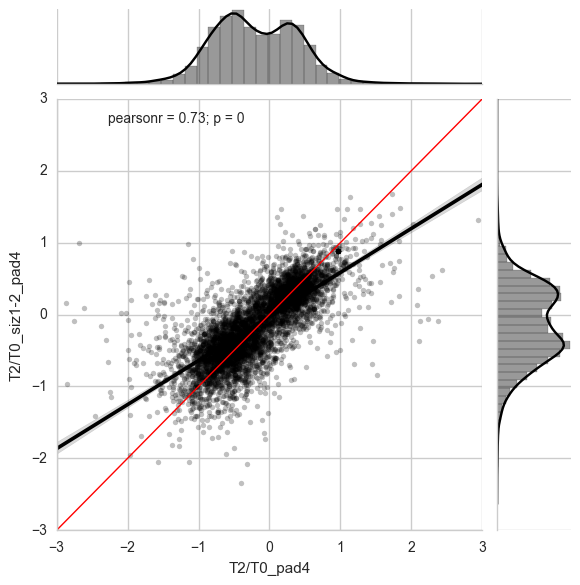

1xB_pad4 allT T1/T0
saved in: results/scatterplots/1xB_pad4/T1-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT.scatter.png


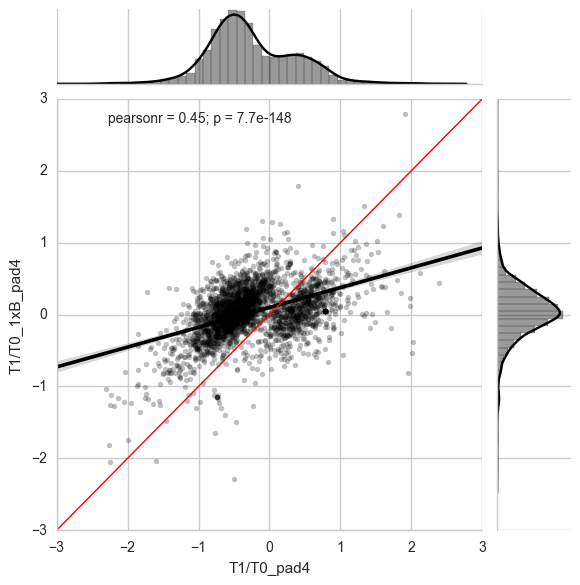

1xB_pad4 allT T2/T1
saved in: results/scatterplots/1xB_pad4/T2-T1_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT.scatter.png


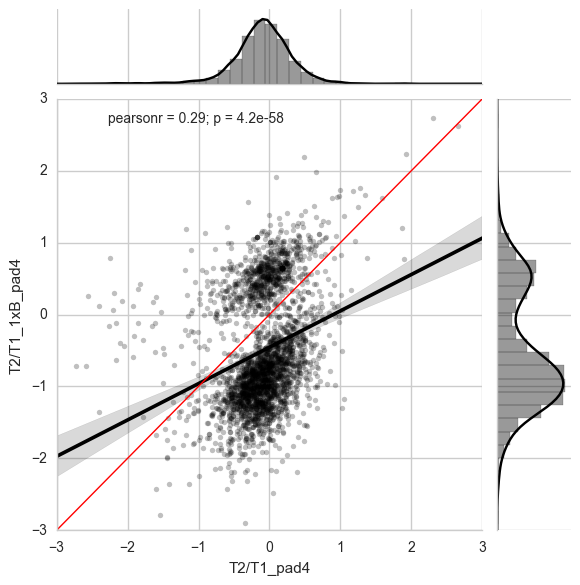

1xB_pad4 allT T2/T0
saved in: results/scatterplots/1xB_pad4/T2-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT.scatter.png


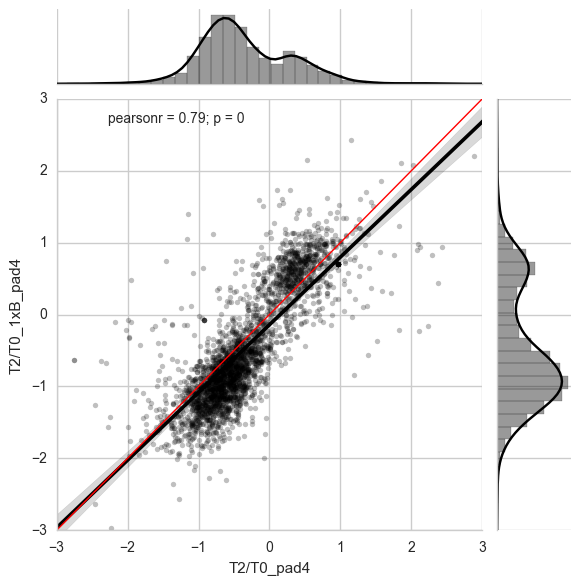

In [8]:
# first, for each mutant, for each timepoint, get all DEGs compared to the background
dirnameStrains = 'data/reanalysisStrains/'

            
def make_scatter_plots(dataframe, BKGR, S, T, outdirname):
        comparisons = ['T1/T0', 'T2/T1', 'T2/T0']
        for comp in comparisons:
            fig_fname = outdirname+S+'/'+\
            comp.replace('/', '-')+'_'+BKGR+'-'+S+'_DEGsIn'+S+'At'+T+'.scatter.png'
            print S, T, comp
            print 'saved in:', fig_fname
            
            plt.figure(figsize=(4,4))
            g = sns.jointplot(dataframe[comp+'_'+BKGR], dataframe[comp+'_'+S],\
                              kind="reg", color='black', scatter_kws = {'s':15, 'alpha':0.25})
            g.ax_joint.set_xlim(-3, 3)
            g.ax_joint.set_ylim(-3, 3)

            (xmin,xmax) = g.ax_joint.get_xlim()
            x = np.arange(xmin,xmax+1)
            g.ax_joint.plot(x, 1*x, color = 'red', linewidth=1)

            plt.savefig(fig_fname, dpi = 700)
            plt.show()
            plt.close()
            

for S in strains[1:]:
    os.system('mkdir -p '+outdirname+'/'+S+'/')
    probes_allT = set([])
    
    for T in timepoints:
        
        # DEGs at timepoint T when comparing mut to bkgr were pickled in 0.Venn_diagrams_timepoints_mutants
        probesT = pickle.load(open('util/pickles/'+T+'_'+BKGR+'_vs_'+S+'.DEGs_q0.01.probes_as_set'))
        probes_allT = probes_allT.union(probesT)
        
        
    DEGs_allT  = df[df.probeset_id.isin(probes_allT)] 
        
    # put all data in a single dataFrame
    rel_data = pd.DataFrame({'probeset_id': DEGs_allT['probeset_id'],\
                             'T1/T0_'+BKGR: DEGs_allT['T1_'+BKGR]-DEGs_allT['T0_'+BKGR],\
                             'T2/T0_'+BKGR: DEGs_allT['T2_'+BKGR]-DEGs_allT['T0_'+BKGR],\
                             'T2/T1_'+BKGR: DEGs_allT['T2_'+BKGR]-DEGs_allT['T1_'+BKGR],\
                             'T1/T0_'+S: DEGs_allT['T1_'+S]-DEGs_allT['T0_'+S],\
                             'T2/T0_'+S: DEGs_allT['T2_'+S]-DEGs_allT['T0_'+S],\
                             'T2/T1_'+S: DEGs_allT['T2_'+S]-DEGs_allT['T1_'+S]})

        
    make_scatter_plots(rel_data, BKGR, S, 'allT', outdirname)
        

We see a delay in the response to temperature change in both _siz1 pad4_ and _sumo1/2KD pad4_. 
  
When we compare the difference in expression level at T1 to T0 for _siz1 pad4_ or _sumo1/2KD pad4_ mutant to the background, we see that in the background strain for many genes, expression levels go either up or down in response to temperature changes (bimodal distribution on top), whereas in the mutant there is little change (distribution on the right), especially compared to the background (black regression line).

When comparing T2 to T1, we see the exact opposite: the mutant is 'catching up'.

___
siz1-2\_pad4 T1/T0 and siz1-2\_pad4 T2/T0 are Figure 5c.  
1xB\_pad4 T1/T0 and 1xB\_pad4 T2/T0 are Figure 5d.
___
  
  


### 2.3 Highlight genes that are putatively involved in growth

We highlight 5 categories of genes, targets of PIF4, targets of BZR1, targets of ARF6, targets of HY5 and SAUR genes, assuming these genes are involve din growth.  

For this we need to convert probeset_id to transcripts to be able to overlay them with PIF4, BZR1, ARF6 and Hy5 target data.



In [14]:
import glob
import utils  # utils.py contains several functions that are used in multiple notebooks

dirnameStrains = 'data/reanalysisStrains/'
transcript2probe = {}
all_probes = set([])
for fname in glob.glob(dirnameStrains+'*_vs_*.txt'):
    transcript2probe, all_probes = utils.update_transcript2probe(fname, transcript2probe, all_probes)
print(str(len(transcript2probe.keys())))

pickle.dump(transcript2probe, open('util/pickles/transcript2probes.pickled', 'w'))
pickle.dump(all_probes, open('util/pickles/all_probes_set.pickled', 'w'))

28343


siz1-2_pad4 allT T1/T0
saved in: data/reanalysisStrains/scatterplots/siz1-2_pad4/T1-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightPIF4.scatter.png


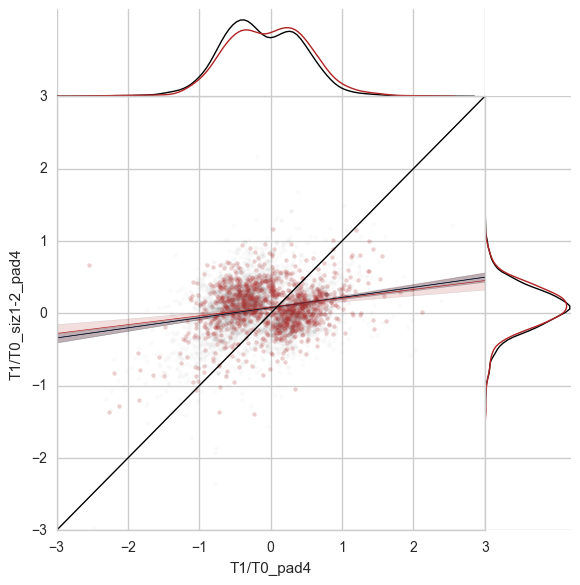

siz1-2_pad4 allT T2/T1
saved in: data/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T1_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightPIF4.scatter.png


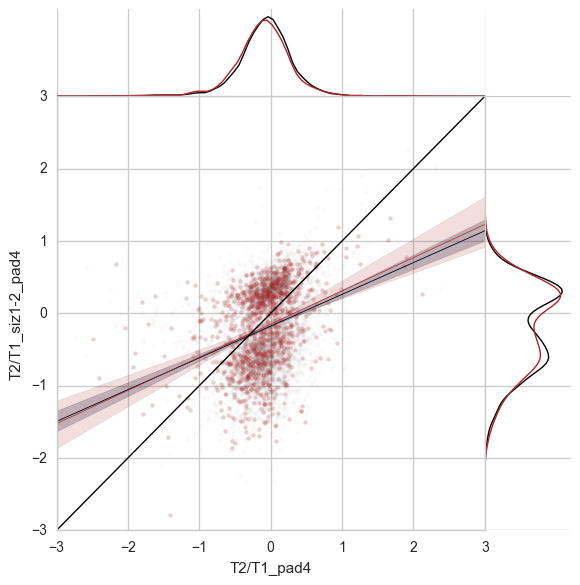

siz1-2_pad4 allT T2/T0
saved in: data/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightPIF4.scatter.png


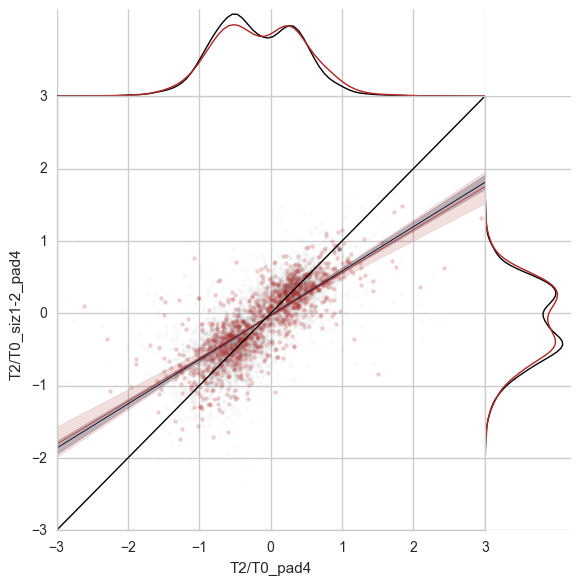

siz1-2_pad4 allT T1/T0
saved in: data/reanalysisStrains/scatterplots/siz1-2_pad4/T1-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightBZR1.scatter.png


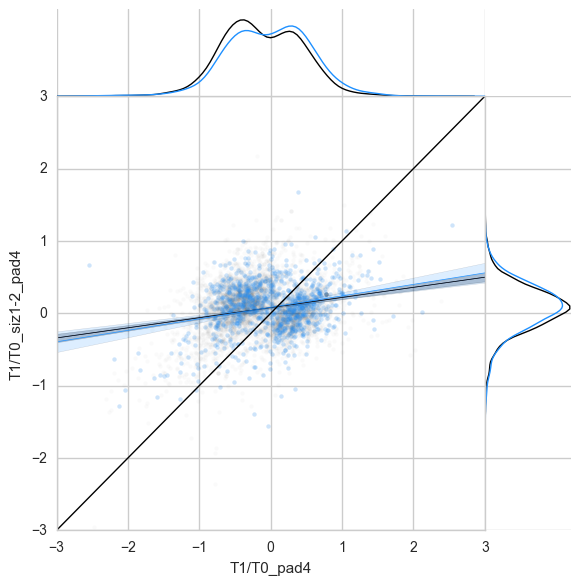

siz1-2_pad4 allT T2/T1
saved in: data/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T1_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightBZR1.scatter.png


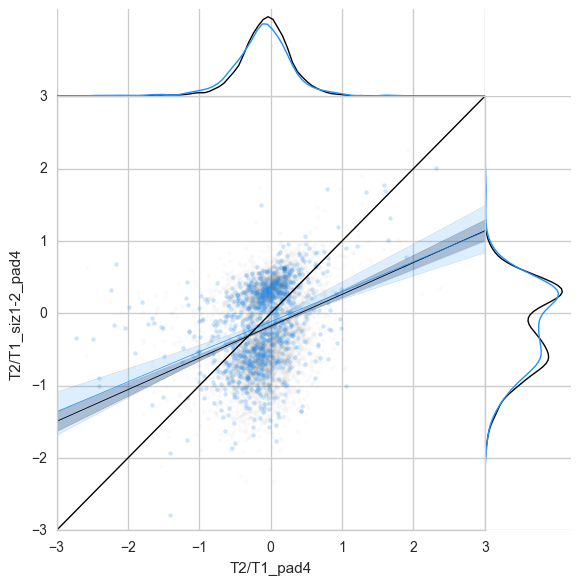

siz1-2_pad4 allT T2/T0
saved in: data/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightBZR1.scatter.png


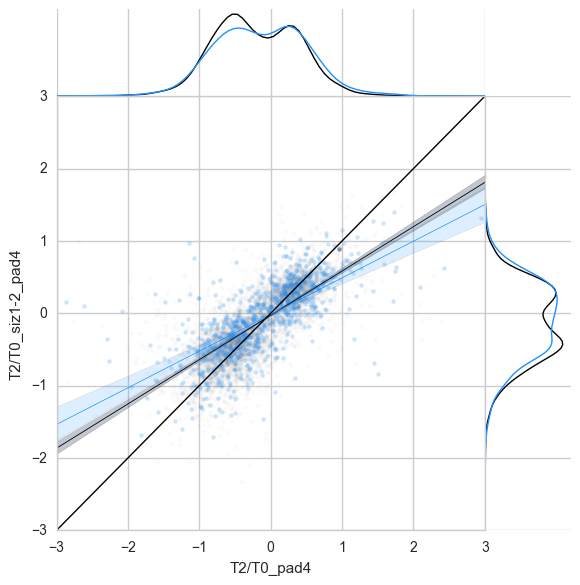

siz1-2_pad4 allT T1/T0
saved in: data/reanalysisStrains/scatterplots/siz1-2_pad4/T1-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightARF6.scatter.png


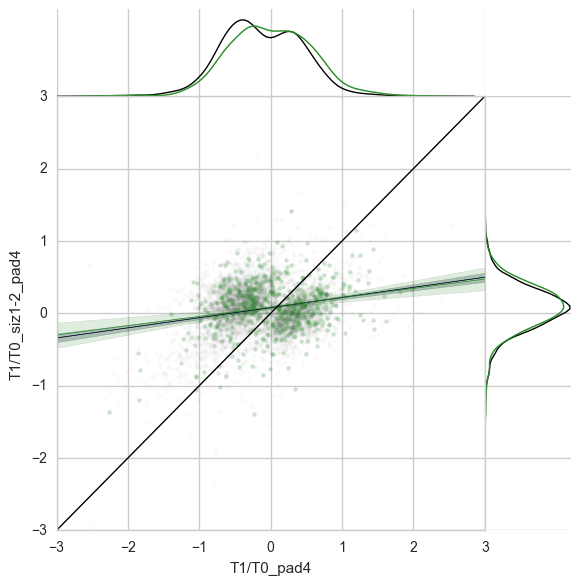

siz1-2_pad4 allT T2/T1
saved in: data/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T1_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightARF6.scatter.png


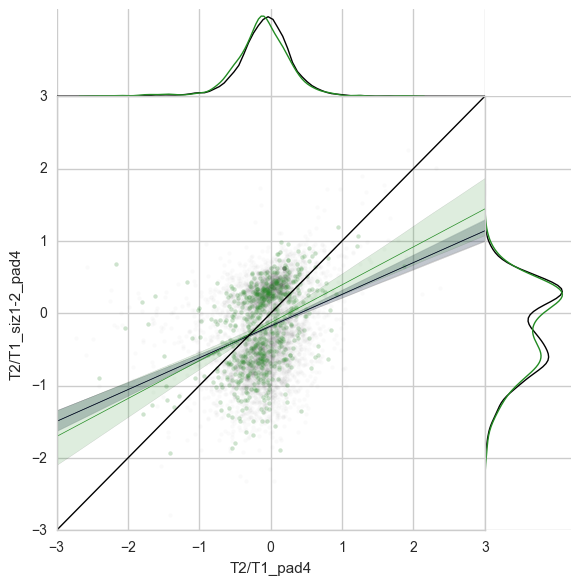

siz1-2_pad4 allT T2/T0
saved in: data/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightARF6.scatter.png


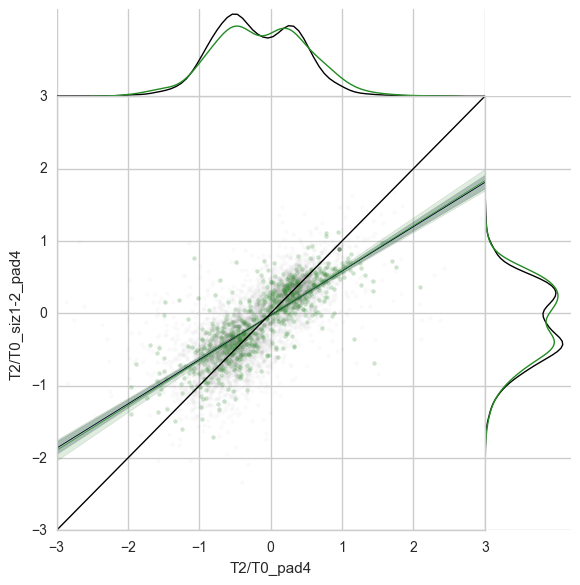

siz1-2_pad4 allT T1/T0
saved in: data/reanalysisStrains/scatterplots/siz1-2_pad4/T1-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightHY5.scatter.png


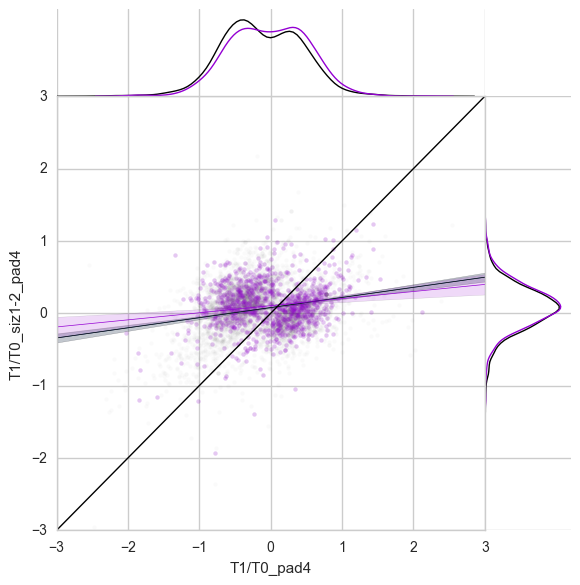

siz1-2_pad4 allT T2/T1
saved in: data/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T1_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightHY5.scatter.png


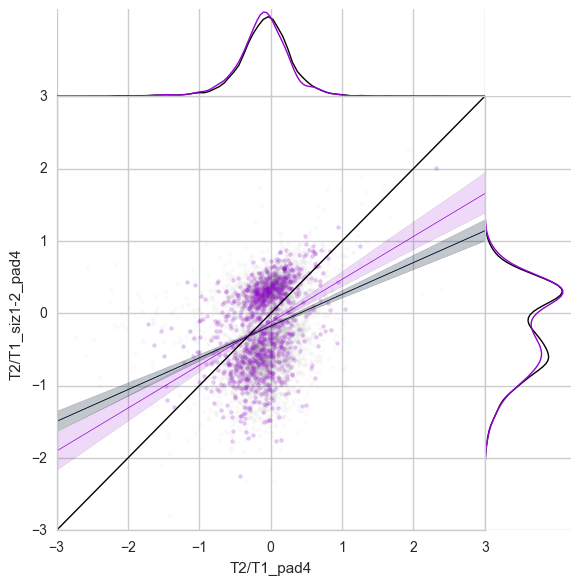

siz1-2_pad4 allT T2/T0
saved in: data/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightHY5.scatter.png


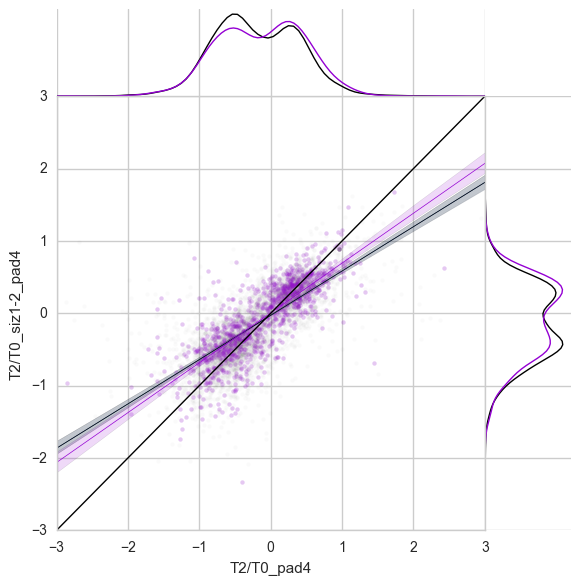

siz1-2_pad4 allT T1/T0
saved in: data/reanalysisStrains/scatterplots/siz1-2_pad4/T1-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightSAUR.scatter.png


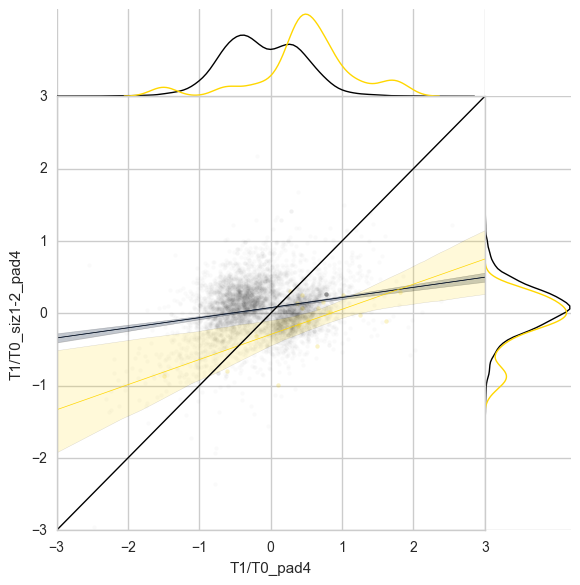

siz1-2_pad4 allT T2/T1
saved in: data/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T1_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightSAUR.scatter.png


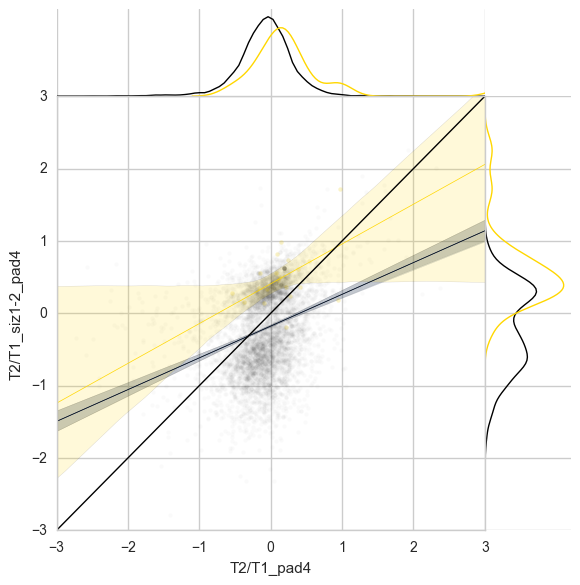

siz1-2_pad4 allT T2/T0
saved in: data/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightSAUR.scatter.png


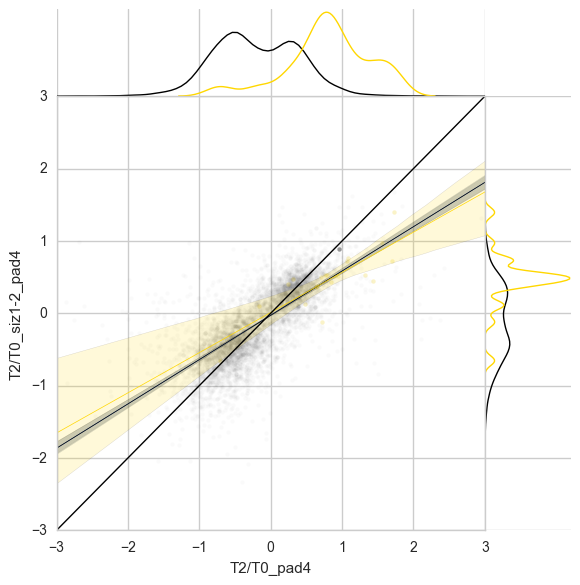

1xB_pad4 allT T1/T0
saved in: data/reanalysisStrains/scatterplots/1xB_pad4/T1-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightPIF4.scatter.png


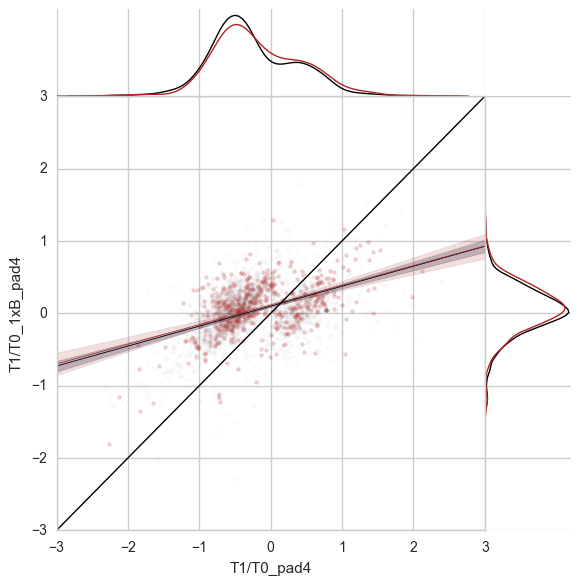

1xB_pad4 allT T2/T1
saved in: data/reanalysisStrains/scatterplots/1xB_pad4/T2-T1_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightPIF4.scatter.png


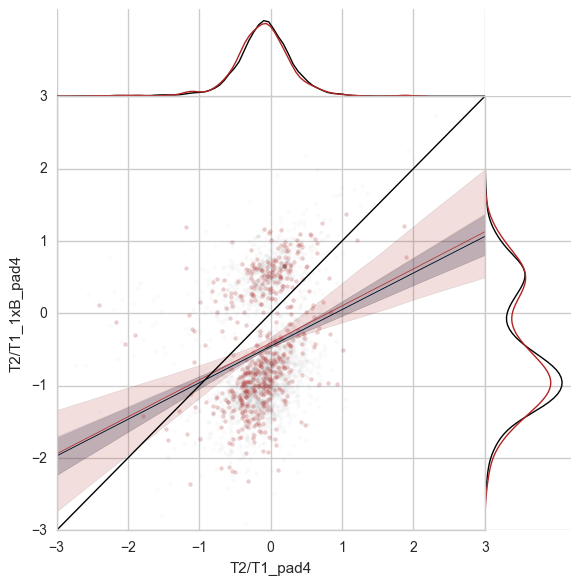

1xB_pad4 allT T2/T0
saved in: data/reanalysisStrains/scatterplots/1xB_pad4/T2-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightPIF4.scatter.png


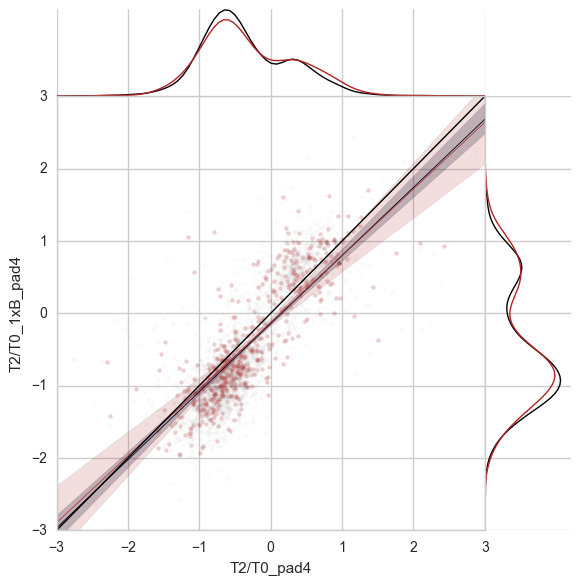

1xB_pad4 allT T1/T0
saved in: data/reanalysisStrains/scatterplots/1xB_pad4/T1-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightBZR1.scatter.png


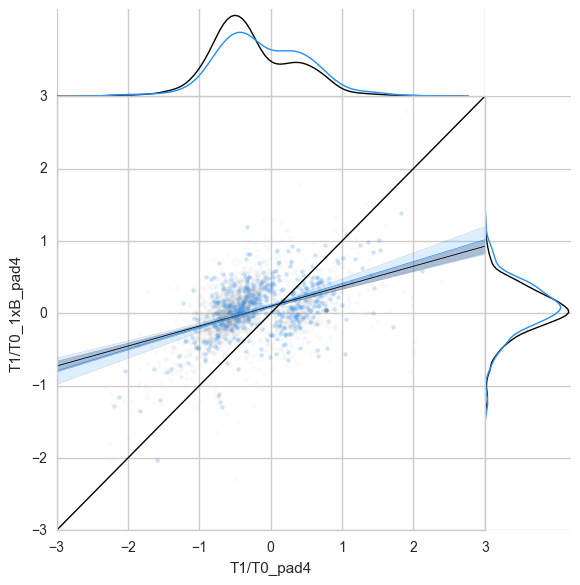

1xB_pad4 allT T2/T1
saved in: data/reanalysisStrains/scatterplots/1xB_pad4/T2-T1_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightBZR1.scatter.png


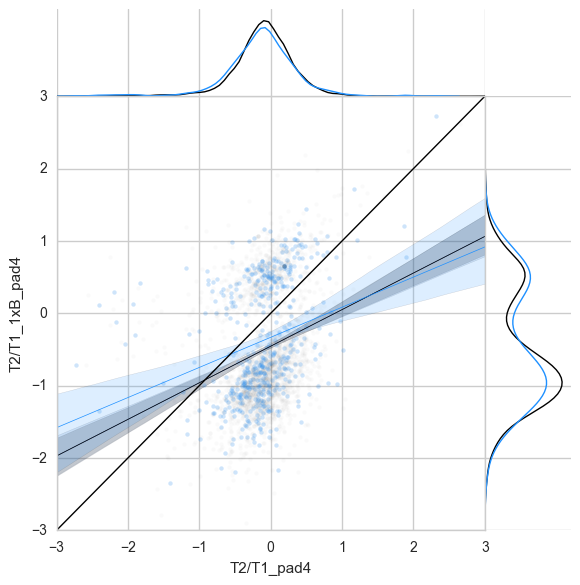

1xB_pad4 allT T2/T0
saved in: data/reanalysisStrains/scatterplots/1xB_pad4/T2-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightBZR1.scatter.png


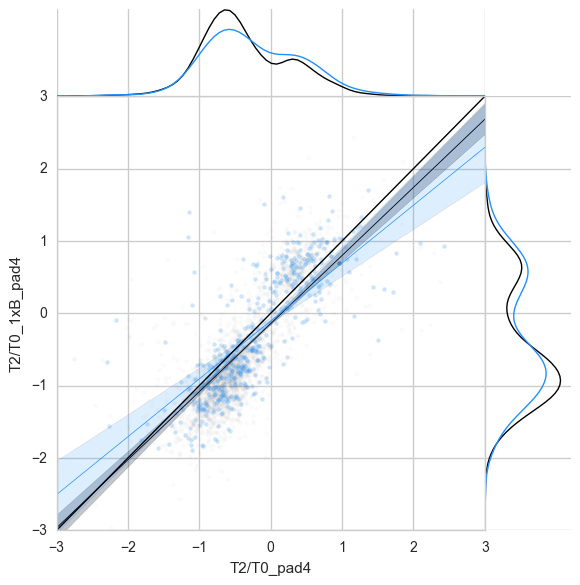

1xB_pad4 allT T1/T0
saved in: data/reanalysisStrains/scatterplots/1xB_pad4/T1-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightARF6.scatter.png


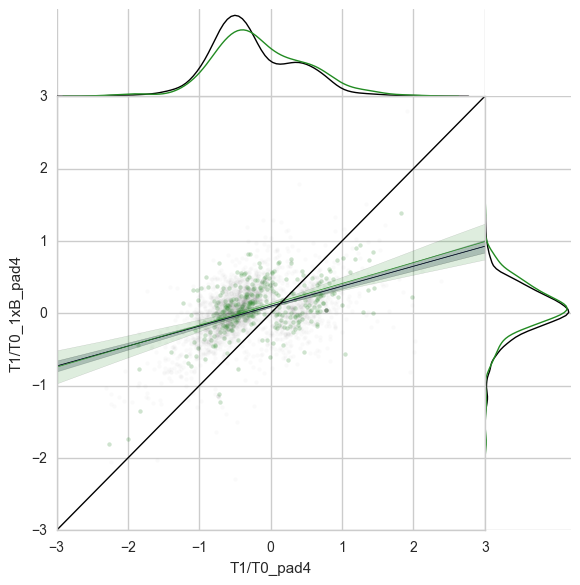

1xB_pad4 allT T2/T1
saved in: data/reanalysisStrains/scatterplots/1xB_pad4/T2-T1_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightARF6.scatter.png


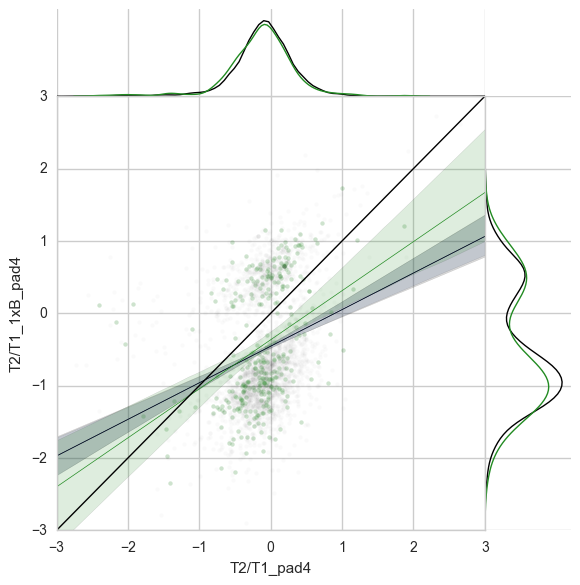

1xB_pad4 allT T2/T0
saved in: data/reanalysisStrains/scatterplots/1xB_pad4/T2-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightARF6.scatter.png


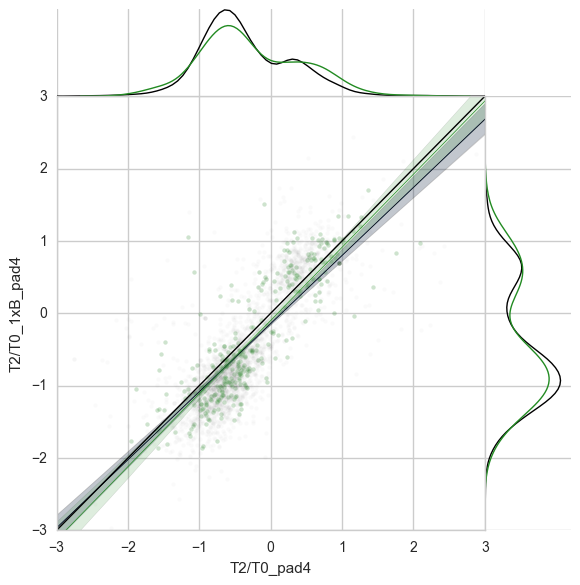

1xB_pad4 allT T1/T0
saved in: data/reanalysisStrains/scatterplots/1xB_pad4/T1-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightHY5.scatter.png


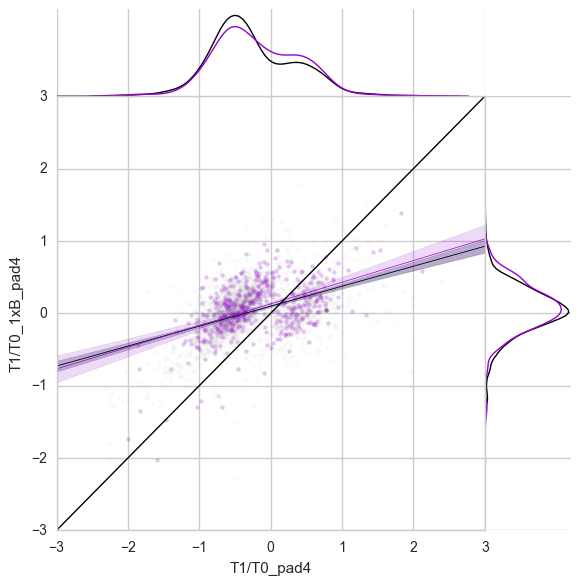

1xB_pad4 allT T2/T1
saved in: data/reanalysisStrains/scatterplots/1xB_pad4/T2-T1_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightHY5.scatter.png


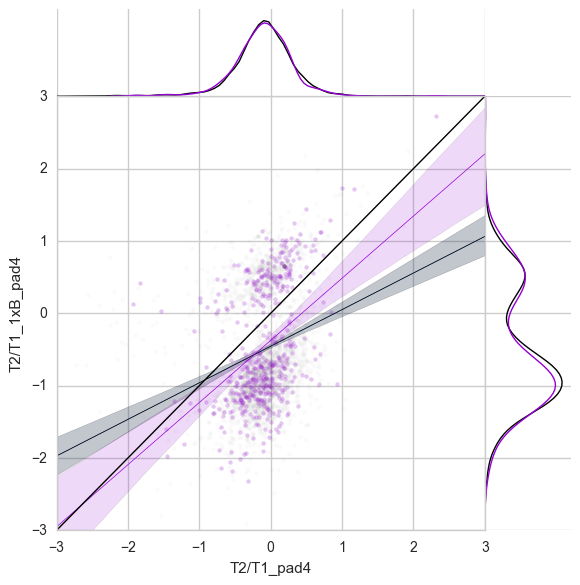

1xB_pad4 allT T2/T0
saved in: data/reanalysisStrains/scatterplots/1xB_pad4/T2-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightHY5.scatter.png


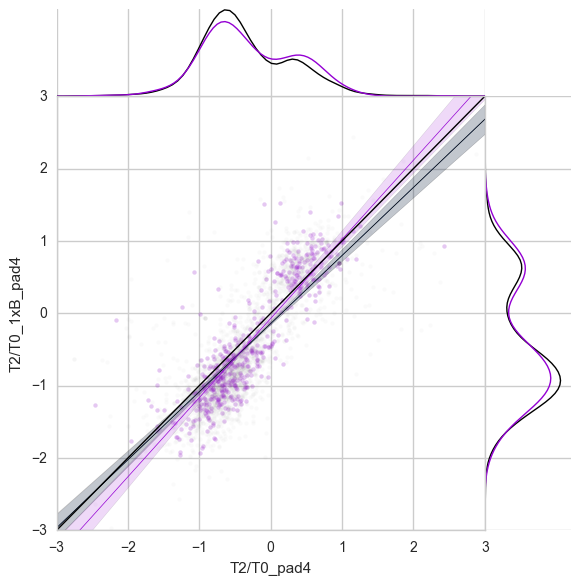

1xB_pad4 allT T1/T0
saved in: data/reanalysisStrains/scatterplots/1xB_pad4/T1-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightSAUR.scatter.png


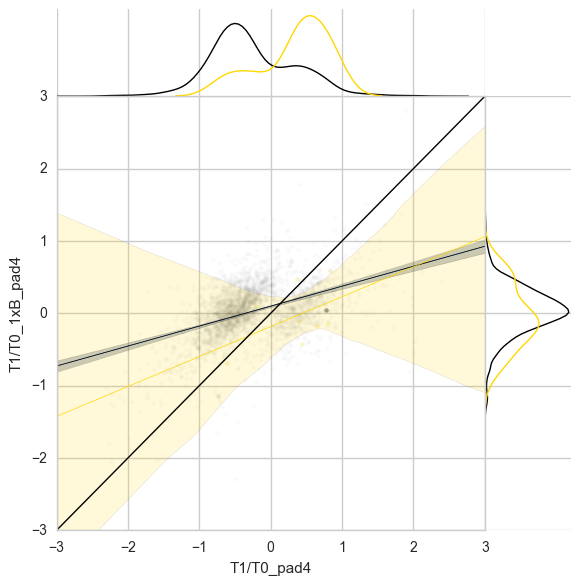

1xB_pad4 allT T2/T1
saved in: data/reanalysisStrains/scatterplots/1xB_pad4/T2-T1_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightSAUR.scatter.png


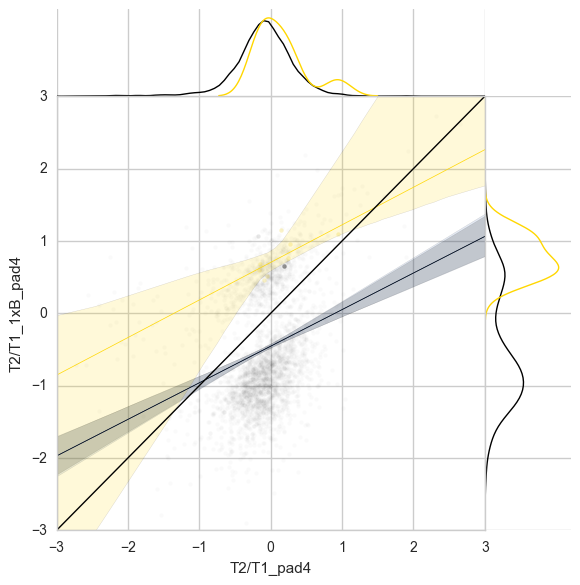

1xB_pad4 allT T2/T0
saved in: data/reanalysisStrains/scatterplots/1xB_pad4/T2-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightSAUR.scatter.png


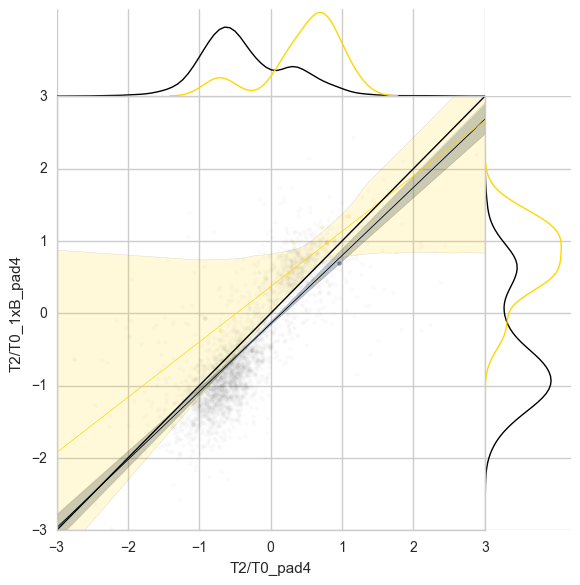

In [12]:
import utils # utils.py contains several functions that are used in multiple notebooks

def make_scatter_plots_highlight(dataframe, BKGR, S, T, outdirname,\
                                 selected_probes, name_selection, color, bkgr_color = 'black', ps = 10, ):
        comparisons = ['T1/T0', 'T2/T1', 'T2/T0']
        for comp in comparisons:
            fig_fname = outdirname+S+'/'+\
            comp.replace('/', '-')+'_'+BKGR+'-'+S+'_DEGsIn'+S+'At'+T+'__highlight'+name_selection+'.scatter.png'
            print S, T, comp
            print 'saved in:', fig_fname
            
            plt.figure(figsize=(4,4))
            # plot all
            g = sns.JointGrid(dataframe[comp+'_'+BKGR], dataframe[comp+'_'+S], space=0)
            g = g.plot_joint(sns.regplot, scatter_kws = {'s':ps, 'alpha':0.02, 'color': bkgr_color}\
                             , line_kws = {'linewidth' : 0.5})
            g.plot_marginals(sns.kdeplot, color=bkgr_color,linewidth=1, legend=False)
            sns.regplot(dataframe[comp+'_'+BKGR], dataframe[comp+'_'+S], ax=g.ax_joint,\
                        color=bkgr_color, scatter = False, line_kws = {'linewidth' : 0.5})
    
            #plot subset (selection) in different color
            subset_data = dataframe[dataframe['probeset_id'].isin(selected_probes)]
            sns.regplot(subset_data[comp+'_'+BKGR], subset_data[comp+'_'+S], ax=g.ax_joint,\
                        color=color, scatter_kws = {'s':ps, 'alpha':0.2, 'marker':'o'}, line_kws = {'linewidth' : 0.5})
            sns.kdeplot(subset_data[comp+'_'+BKGR], color=color, ax = g.ax_marg_x,linewidth=1,legend=False)
            sns.kdeplot(subset_data[comp+'_'+S], color=color, ax = g.ax_marg_y,vertical=True\
                        ,linewidth=1, legend=False)
            
            g.ax_joint.set_xlim(-3, 3)
            g.ax_joint.set_ylim(-3, 3)

            (xmin,xmax) = g.ax_joint.get_xlim()
            x = np.arange(xmin,xmax+1)
            g.ax_joint.plot(x, 1*x, color = 'black', linewidth=1)

            plt.savefig(fig_fname, dpi = 700)
            plt.show()
            plt.close()


# lists with TF targets
gene_lists = ['PIF4', 'BZR1', 'ARF6', 'HY5', 'SAUR']
color_list = ['#B22222', '#1E90FF', '#228B22', '#9400D3', '#FFD700']

for S in strains[1:]:
    os.system('mkdir -p '+outdirname+'/'+S+'/')
    probes_allT = set([])
    
    for T in timepoints:
        probesT = pickle.load(open('util/pickles/'+T+'_'+BKGR+'_vs_'+S+'.DEGs_q0.01.probes_as_set'))
        probes_allT = probes_allT.union(probesT)
        
        
    DEGs_allT  = df[df.probeset_id.isin(probes_allT)] 
        
    # put all data in a single dataFrame
    rel_data = pd.DataFrame({'probeset_id': DEGs_allT['probeset_id'],\
                             'T1/T0_'+BKGR: DEGs_allT['T1_'+BKGR]-DEGs_allT['T0_'+BKGR],\
                             'T2/T0_'+BKGR: DEGs_allT['T2_'+BKGR]-DEGs_allT['T0_'+BKGR],\
                             'T2/T1_'+BKGR: DEGs_allT['T2_'+BKGR]-DEGs_allT['T1_'+BKGR],\
                             'T1/T0_'+S: DEGs_allT['T1_'+S]-DEGs_allT['T0_'+S],\
                             'T2/T0_'+S: DEGs_allT['T2_'+S]-DEGs_allT['T0_'+S],\
                             'T2/T1_'+S: DEGs_allT['T2_'+S]-DEGs_allT['T1_'+S]})

    outdirname = dirnameStrains+'scatterplots/'
    
    for index, name_selection in enumerate(gene_lists):
        # get selected transcripts (e.g. TF targets)
        subset = set([utils.homogenize_geneID(x) for x in open('gene_lists/'+name_selection+'.txt', 'U')])
        
        #convert these geneIDs to probeids
        subset_probes = set([])
        Nunknown = 0
        for transcript_id in subset:
            if transcript2probe.has_key(transcript_id):
                subset_probes.add(transcript2probe[transcript_id]) 
                
        #highlight subset of genes in scatterplot
        make_scatter_plots_highlight(rel_data, BKGR, S, 'allT', outdirname,\
                                 subset_probes, name_selection, color_list[index])                                              
                                                


___
The scatterplots above are in Figure S6-S9
___
